# 1. Data Exploration

## 1. Import Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load The Data Set

In [30]:
df = pd.read_excel("data/NBA_DATA_2022-2023_2017-2018.xlsx")

## 3. View My Columns

In [31]:
df.columns

Index(['NAME', 'TEAM', 'POSITION', 'SALARY', 'Age', 'Tm', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%',
       'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'height', 'weight', 'collage', 'birth_city', 'birth_state',
       'Time'],
      dtype='object')

Column Description:
- Tm: Team
- G: Games Played
- GS: Games Started
- MP: Minutes Played
- FG: Field Goals Made (2 Pointers + 3 Pointers)
- FGA: Field Goals Attempted 
- FG%: Field Goal Percentage (FG/FGA)
- 3P: 3 Pointers Made 
- 3PA: 3 Pointers Attempted
- 3P%: 3 Pointer Percentage (3P/3PA)
- 2P: 2 Pointers Made 
- 2PA: 2 Pointers Attempted
- 2P%: 2 Pointer Percentage (2P/2PA)
- eFG%: Effective Field Goal Percentage (Meaning that the percentage takes into account that 3 pointers are worth 3 points while 2 pointers are less valuable)
- FT: Free Throws Made 
- FTA: Free Throws Attempted 
- FT%: Free Throw Percentage (FT/FTA)
- ORB: Rebounds While on Offense
- DRB: Rebounds While on Defense 
- TRB: Total Rebounds (ORB + DRB)
- AST: Assits 
- STL: Steals 
- BLK: Blocks 
- TOV: Turnovers
- PF: Personal Fouls 
- PTS: Points Scored
- Time: 2022-23 or 2017-18




## 4. Check For Unique, Null and Duplicated Values

In [32]:
# Find the null values for each column
df.isna().sum()

# Find the unique values for these two as they have null values I am loking to replace
df['birth_city'].unique()
df['birth_state'].unique()

# Check For Duplicates only for Players to make sure a player is not included twice
df.duplicated(['NAME']).sum()
df.loc[df.duplicated('NAME', keep=False)].sort_values(['Time'])


,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,BLK,TOV,PF,PTS,height,weight,collage,birth_city,birth_state,Time
177,Al Horford,Boston Celtics,C,27734406,31,BOS,72,72,31.6,5.1,...,1.1,1.8,1.9,12.9,208,111,University of Florida,Puerto Plata,Dominican Republic,2017-2018
280,Dwight Powell,Dallas Mavericks,C,9003125,26,DAL,79,25,21.2,3.2,...,0.4,0.7,2.4,8.5,211,108,Stanford University,Toronto,Canada,2017-2018
278,Norman Powell,Toronto Raptors,G,9367200,24,TOR,70,18,15.2,2.1,...,0.2,0.9,1.6,5.5,193,97,"University of California, Los Angeles",San Diego,California,2017-2018
277,Josh Richardson,Miami Heat,SG,9367200,24,MIA,81,81,33.2,4.9,...,0.9,1.7,2.5,12.9,198,90,University of Tennessee,Edmond,Oklahoma,2017-2018
276,Matthew Dellavedova,Milwaukee Bucks,PG,9607500,27,MIL,38,3,18.7,1.4,...,0.0,1.3,1.8,4.3,193,89,Saint Mary's College of California,Maryborough,Australia,2017-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Mike Muscala,Boston Celtics,C,3500000,31,OKC,43,5,14.5,2.1,...,0.4,0.3,1.6,6.2,211,108,Bucknell University,St. Louis Park,Minnesota,2022-2023
109,Alex Len,Sacramento Kings,C,3918000,29,SAC,26,2,6.2,0.6,...,0.4,0.6,1.1,1.7,216,117,University of Maryland,Antratsit,Ukraine,2022-2023
108,George Hill,Indiana Pacers,PG,4000000,36,IND,11,1,15.1,1.7,...,0.3,0.6,1.3,5.2,190,85,Indiana University-Purdue University Indianapolis,Indianapolis,Indiana,2022-2023
116,Trey Lyles,Sacramento Kings,PF,2700000,27,SAC,74,0,16.9,2.5,...,0.4,0.9,1.3,7.6,208,106,University of Kentucky,Saskatoon,Canada,2022-2023


- When taking a look at the different null values, the null values fall under only percentage based statistics, colleges, birth_cities, and birth_states. For percentage based statistics, a good assumption would be that it comes from trying to avoid a ZeroDivisionError: If a player was to take no shots, then the divisor will be zero which would result in a ZeroDivisionError.

- Though birth state and city are 5% null, those are easily findable values that I can change

- For College, it is over 10% null so I will drop that column 

- I did not bother looking for duplicates in this set as players can have the same stats or be from the same city 

# 2. Data Cleaning 

## 1. Drop Unecessary Columns, Query Data For Specific Range, and Drop Duplicates

In [33]:
# Drop the College Column
df = df.drop("collage", axis=1)
df.columns

# Query the data so I only keep the players in 2022-2023
df1 = df.query("Time == '2022-2023'")

# Drop the Duplicates so that there are no repeat names in the data set  
df1 = df1.drop_duplicates('NAME', keep=False)


# Now that Duplicates are dropped and data is queryed, check for null values again
df1.isna().sum()


NAME           0
TEAM           0
POSITION       0
SALARY         0
Age            0
Tm             0
G              0
GS             0
MP             0
FG             0
FGA            0
FG%            0
3P             0
3PA            0
3P%            1
2P             0
2PA            0
2P%            0
eFG%           0
FT             0
FTA            0
FT%            0
ORB            0
DRB            0
TRB            0
AST            0
STL            0
BLK            0
TOV            0
PF             0
PTS            0
height         0
weight         0
birth_city     5
birth_state    5
Time           0
dtype: int64

- Removing the duplicates and old players did me a huge favor since most of the null values came in older seasons of players that we did not need

- We want to be as relevant to today as possible, so I only kept players from last years 2022-2023 season

- Now I just need to replace five player's birth city and state with unknown, and replace the one players three point percentage with 0

In [34]:
# Map missing values to 0
df1["3P%"] = df1["3P%"].fillna(0)


# 3. Exploratory Data Analysis

## 1. Examining Salary vs FG (Shots Made) 

<Axes: title={'center': 'Salary vs FG'}, xlabel='SALARY', ylabel='FG'>

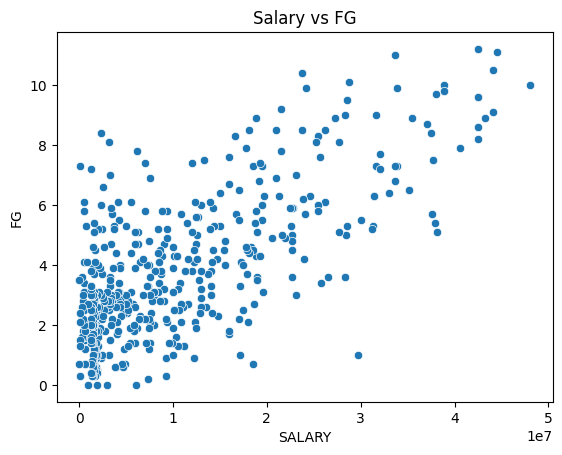

In [35]:
plt.title("Salary vs FG")

sns.scatterplot(data=df, x='SALARY', y='FG')

As you would expect, as a players salary increases, so does their production. The majority of the highest paid players are scoring the most points in the NBA. However, if you look left, there are some less payed players that also make field goals. A possible result of this pay gap is difference in impact on team success that the players have.

## 2. Age Variation in the NBA

,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,height,weight,birth_city,birth_state,Time
103,Johnny Davis,Washington Wizards,G,4810320,20,WAS,28,5,15.1,2.4,...,0.4,0.3,0.6,1.7,5.8,188,77,Detroit,Michigan,2022-2023


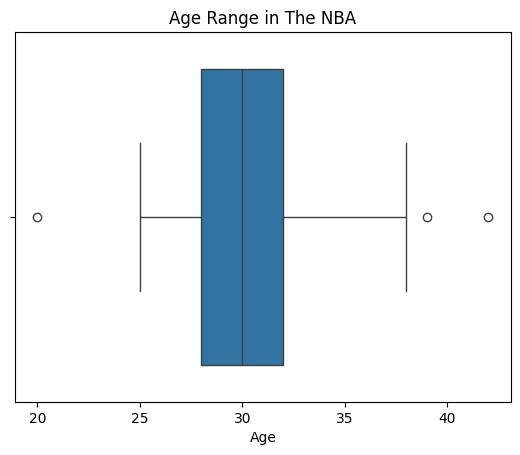

In [36]:
plt.title('Age Range in The NBA')
sns.boxplot(data=df1, x='Age')
df1.loc[df1['Age'] == df1['Age'].max()]
df1.loc[df1['Age'] == df1['Age'].min()]


As can be seen in the boxplot, the majority of NBA players are about 30 years old. There are a few outliers such as Udonis Haslem of the Miami Heat who is the oldest player in the NBA at 42 years old and LeBron James at 38 years old. Due to a lack of data on younger players coming out of the current NBA draft, the youngest player given in this boxplot was Johnny Davis of the Washington Wizards at 20 years old

## 3. Checking the spread of Salary in the NBA 

,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,STL,BLK,TOV,PF,PTS,height,weight,birth_city,birth_state,Time
0,Stephen Curry,Golden State Warriors,PG,48070014,34,GSW,56,56,34.7,10.0,...,0.9,0.4,3.2,2.1,29.4,190,86,Akron,Ohio,2022-2023


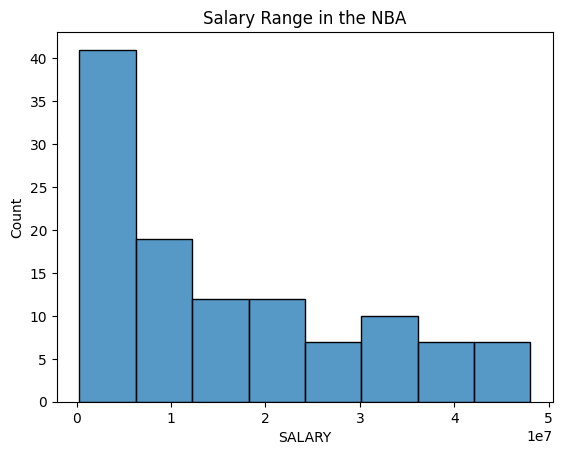

In [37]:
plt.title('Salary Range in the NBA')
sns.histplot(data=df1, x='SALARY')
df1.loc[df1['SALARY'] == df1['SALARY'].max()]

The Majority of the players in the data set make anywhere from 0-5 million dollars while NBA star stephen curry made the most money this season. The amount of money made by curry makes sense considering he was crowned champion and finals MVP the previous season

## Question 1: Which NBA Player gives the most value for their salary

Make a stat that captures multiple aspects that a player presents to a team:

eFG + PTS + REBS + ASTS - TOV - PF + BLKS + STLS

In [38]:
df1['value'] = df1['eFG%'] + df1['AST'] + df1['TRB'] + df1['PTS'] + df1['STL'] + df1['BLK'] - df1['PF'] - df1['TOV']

In [39]:
df1['val_per_salary'] = df1['value'] / df1['SALARY']

,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,TOV,PF,PTS,height,weight,birth_city,birth_state,Time,value,val_per_salary
147,Kris Dunn,Utah Jazz,G,735819,28,UTA,22,3,25.8,5.3,...,1.6,2.6,13.2,193,95,New London,Connecticut,2022-2023,21.276,0.000029


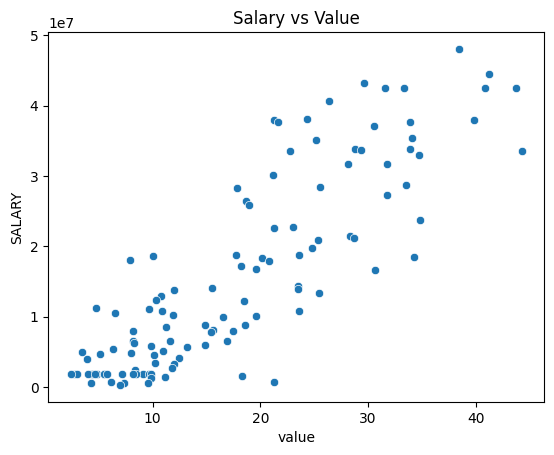

In [40]:
plt.title("Salary vs Value")
sns.scatterplot(data=df1, x='value', y='SALARY')
df1.loc[df1['val_per_salary'] == df1['val_per_salary'].max()]

It can be clearly be seen that the more value a player gives, the more they typically get played. However, the player that gave the most value to their team this year was Kris Dunn of the Utah Jazz.

## Question 2: Which player got the most pure buckets, and which player got the most fake buckets (free throws)

To do this, I will take the players points and subtract the freethrows from it to see who had the most total points without freethrows. For fake buckets, I will do most freethrow attempts. To make this statistic more fair to lesser known players, I will make it so we can get their points per minute rather than just their total. The same thing will apply to freethrows as well.

In [41]:
df1['pure_buckets'] = (df1['PTS'] / df1['MP']) - (df1['FT']/df1['MP'])
df1['fake_buckets'] = (df1['FT']/df1['MP'])
df1.loc[df1['pure_buckets'] == df1['pure_buckets'].max()]
df1.loc[df1['fake_buckets'] == df1['fake_buckets'].min()]

,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,PTS,height,weight,birth_city,birth_state,Time,value,val_per_salary,pure_buckets,fake_buckets
104,Ish Smith,Denver Nuggets,PG,4750000,34,DEN,43,0,9.3,1.2,...,2.5,183,79,Charlotte,North Carolina,2022-2023,5.105,0.000001,0.268817,0.0


<Axes: title={'center': 'Pure Buckets Graph'}, xlabel='pure_buckets', ylabel='Count'>

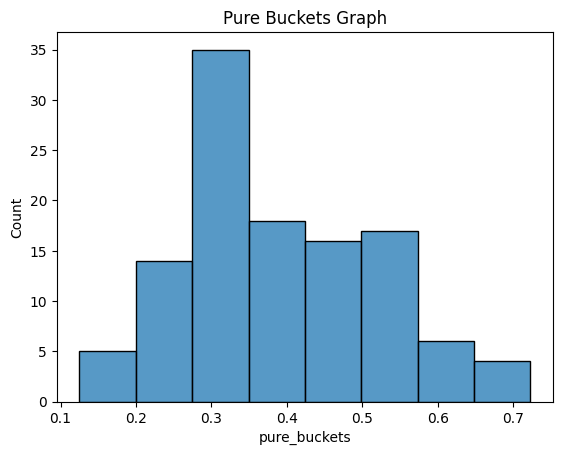

In [42]:
# Graph of Pure buckets
plt.title("Pure Buckets Graph")
sns.histplot(data=df1, x='pure_buckets')

As can be seen, there is a pretty steep fall off at close to 0.6 pure buckets per minute

## Question 3: Who was the biggest Menace in the NBA

To figure this out, I will take the amount of personal fouls a player had and add it to purely defensive stats, then I will subtract their points and assits as those do not qualify as menacing stats and we want the most menacing player possible.

In [43]:
df1['most_menacing'] = df1['PF'] + df1['STL'] + df1['BLK'] + df1['TRB'] - df1['PTS']
df1.loc[df1['most_menacing'] == df1['most_menacing'].max()]

,NAME,TEAM,POSITION,SALARY,Age,Tm,G,GS,MP,FG,...,height,weight,birth_city,birth_state,Time,value,val_per_salary,pure_buckets,fake_buckets,most_menacing
54,Steven Adams,Memphis Grizzlies,C,17926829,29,MEM,42,42,27.0,3.7,...,213,115,Rotorua,New Zealand,2022-2023,20.797,0.000001,0.277778,0.040741,7.2


<Axes: title={'center': 'NBA Menaces'}, xlabel='most_menacing', ylabel='Count'>

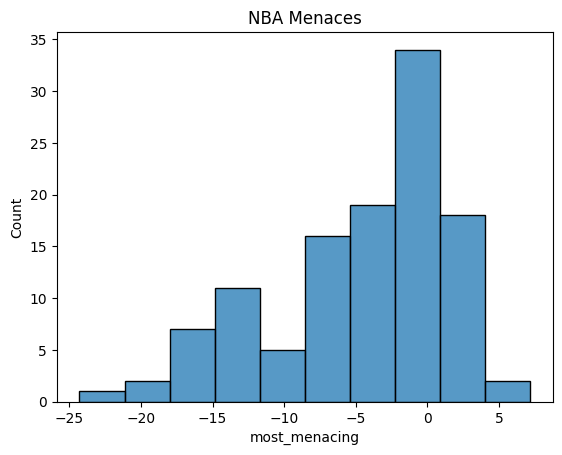

In [44]:
# Menace Graph
plt.title("NBA Menaces")
sns.histplot(data=df1, x='most_menacing')